# Training Deep Neural Networks

Whilst simple neural networks are relatively easy to train, once the complexity of the network exceeds 10 layers or so, each containing hundreds of neurons and connection, various problems can arise.

1. __Vanishing Gradients__: Is when the gradients grow smaller and smaller (or larger and larger) during training backpropagation.
2. __Insufficient Data__: Large networks require large training data sets, or labeled data might be prohibitively expensive.
3. __Slow Training__: Self explanatory.
4. __Overfitting__: More complex model are more susceptible to accidentally modeling random noise in the data, or fitting too well to the training data making it less general.

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

## The Vanishing/Exploding Gradients Problem

- During backpropagation, the corrective changes to each layer (using gradient descent) get smaller and smaller (_vanishing gradients_).
- However, in some cases the opposite can also happen (_exploding gradients_)
- Potentially caused by use of the sigmoid activation function and normal distribution of initialised random weights.
- Using sigmoid activation funciton and normal distribution initisation, the variance of the outputs of each layer are much greater than the variance of the inputs.

In [4]:
def logit(z):
    return 1 / (1 + np.exp(-z))

# data for logit function
z = np.linspace(-5, 5, 200)

# Plot indexing lines around sigmoid function
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)

# Add text annotations
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")

plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

NameError: name 'plt' is not defined

- Can see that when inputs become large(positive or negative), the function saturates at 0 or 1
- The derivative is therefore very close to 0.
- Backpropagation gets weaker as it progresses back through the layers by making the deaper layers very hard to train

## Glorot and He Initialisation

- The variance of the outputs of each layer need to be equal to the variance of its inputs
- Need the gradients to have equal variance variance before and after flowing through a layer in the reverse direction
- Think of the microphone analogy

In [15]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

Using TensorFlow backend.


['Constant',
 'Identity',
 'Initializer',
 'K',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'absolute_import',
 'constant',
 'deserialize',
 'deserialize_keras_object',
 'division',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'normal',
 'np',
 'one',
 'ones',
 'orthogonal',
 'print_function',
 'random_normal',
 'random_uniform',
 'serialize',
 'serialize_keras_object',
 'six',
 'truncated_normal',
 'uniform',
 'zero',
 'zeros']

## Nonsaturating Activation Functions

In [11]:
# Supported Activation Functions
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

### Leaky ReLU

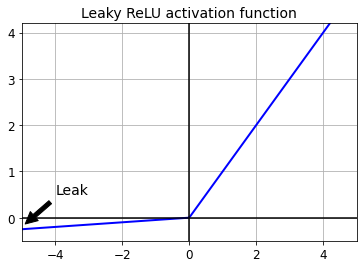

In [10]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

# data for leaky relu function
z = np.linspace(-5, 5, 200)

# Plot indexing lines around leaky relu function
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')

# Add text annotations
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")

plt.grid(True)
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()


### ELU

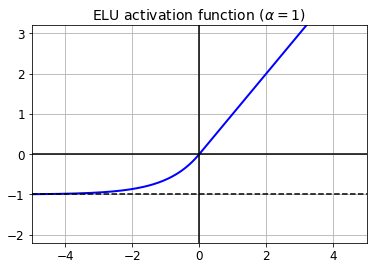

In [12]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')

plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [ ]:
# Implementation in Tensorflow
# keras.layers.Dense(10, activation="elu")

### SELU

In [17]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

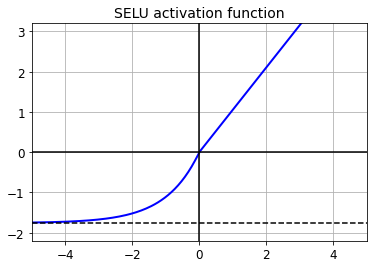

In [20]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')

plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [21]:
# Implementation in Tensorflow
# keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

### SELU Example

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
# for layer in range(99):
#     model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model.add(keras.layers.Dense(10, activation="softmax"))

In [3]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 9s 159us/sample - loss: 0.7302 - accuracy: 0.7468 - val_loss: 0.5465 - val_accuracy: 0.8130
Epoch 2/5
55000/55000 [==============================] - 8s 143us/sample - loss: 0.5210 - accuracy: 0.8197 - val_loss: 0.4934 - val_accuracy: 0.8322
Epoch 3/5
55000/55000 [==============================] - 8s 151us/sample - loss: 0.4798 - accuracy: 0.8332 - val_loss: 0.4678 - val_accuracy: 0.8412
Epoch 4/5
55000/55000 [==============================] - 8s 152us/sample - loss: 0.4569 - accuracy: 0.8411 - val_loss: 0.4530 - val_accuracy: 0.8498
Epoch 5/5
55000/55000 [==============================] - 8s 154us/sample - loss: 0.4411 - accuracy: 0.8473 - val_loss: 0.4418 - val_accuracy: 0.8510


## Batch Normalisation

- Different initialisation such as He, along with ELU cannot guarenty safety from vanishing/exploding gradients during training.
- BN consists of adding an operation in the model just before or after the activation function of each hidden layer.
- This operation simply zero-centers and normalises each input, then scales and shifts the result using two new parameter vectors per layer. One for scaling, the other for shifting.
- In other words, this operation lets the model learn the optimal scale and mean of each layer of the layers input.
- Can also make network much less sensitive to weight initialisation with much larger learning rates.
- Also acts as a regulariser, reducing the need for dropout and other techniques.

Disadvantages

- Increase in runtime in both training and testing. The latter can be alievated by "fusing" the batch layer with the previous layer.
- Increase training is somewhat countered by faster convergence in model accuracy.

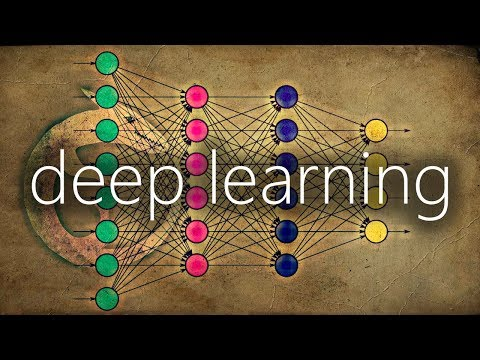

In [9]:
from IPython.display import YouTubeVideo

YouTubeVideo('dXB-KQYkzNU')

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    # Just add a Batch layer before each hidden layer (this is the first layer after input)
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

# Adding batch layers really only impacts larger (deeper) NN's

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

- Each BN layers add four parameters per imput.

In [8]:
# Looking at the parameters of the first layers
bn1 = model.layers[1]

# Two are trainable via backprop, and two are not
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [20]:
# Keras automatically calls these operations, updating the moving averages
model.layers[1].updates

[<tf.Operation 'cond_22/Identity' type=Identity>,
 <tf.Operation 'cond_23/Identity' type=Identity>]

In [17]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 16s 297us/sample - loss: 0.8774 - accuracy: 0.7032 - val_loss: 0.5668 - val_accuracy: 0.8098
Epoch 2/10
55000/55000 [==============================] - 15s 274us/sample - loss: 0.5888 - accuracy: 0.7975 - val_loss: 0.4835 - val_accuracy: 0.8370
Epoch 3/10
55000/55000 [==============================] - 16s 287us/sample - loss: 0.5222 - accuracy: 0.8193 - val_loss: 0.4436 - val_accuracy: 0.8504
Epoch 4/10
55000/55000 [==============================] - 16s 291us/sample - loss: 0.4862 - accuracy: 0.8313 - val_loss: 0.4189 - val_accuracy: 0.8580
Epoch 5/10
55000/55000 [==============================] - 16s 288us/sample - loss: 0.4577 - accuracy: 0.8421 - val_loss: 0.4025 - val_accuracy: 0.8624
Epoch 6/10
55000/55000 [==============================] - 16s 287us/sample - loss: 0.4396 - accuracy: 0.8465 - val_loss: 0.3914 - val_accuracy: 0.8660
Epoch 7/10
55000/55000 [=====================

## Gradient Clipping